# Classification

* **Binary classification:**	Target can be one of two options, e.g. yes or no;	Predict whether or not someone has heart disease based on their health parameters.
* **Multi-class classification:**	Target can be one of more than two options;	Decide whether a photo is of food, a person or a dog.
* **Multi-label classification:**	Target
can be assigned more than one option; Predict what categories should be assigned to a Wikipedia article (e.g. mathematics, science & philosophy).

## Making Data

In [ ]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000
X, y = make_circles(n_samples, noise = 0.03, random_state=42)

This type of dataset is called a toy dataset

In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
X, y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [ ]:
circles = pd.DataFrame({"X1": X[:,0], "X2": X[:,1], "label": y})
circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


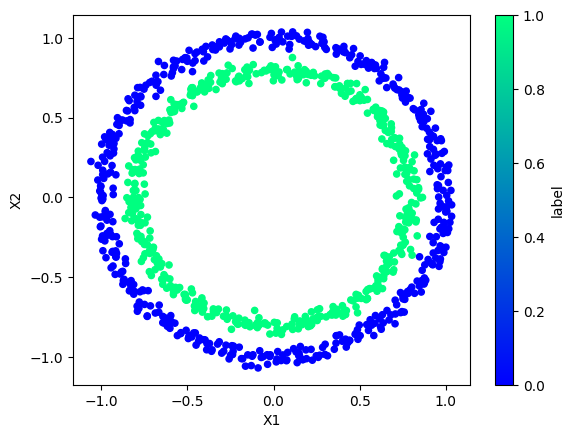

In [ ]:
circles.plot.scatter(x="X1", y="X2", c="label", colormap="winter")
plt.show()

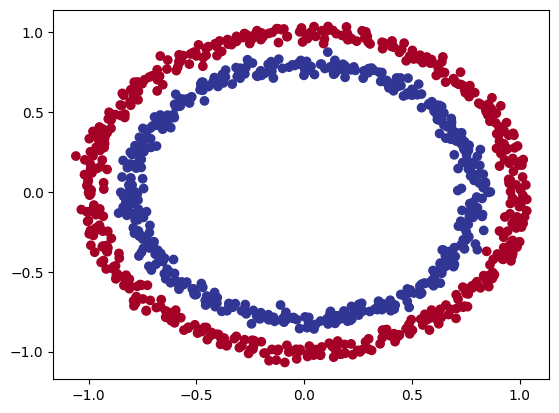

In [ ]:
plt.scatter(x = circles.X1, y = circles.X2, c = circles.label, cmap = plt.cm.RdYlBu)

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [ ]:
import torch
torch.__version__

'2.5.1+cu124'

In [ ]:
# Numpy to Tensor
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X.dtype, y.dtype

(torch.float32, torch.float32)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
X_train, X_train.shape

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         ...,
         [ 0.0157, -1.0300],
         [ 1.0110,  0.1680],
         [ 0.5578, -0.5709]]),
 torch.Size([800, 2]))

## Build a Model

In [ ]:
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
class CircleModel(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer1 = nn.Linear(in_features=2, out_features=5)
    self.layer2 = nn.Linear(in_features=5, out_features=1)

  def forward(self, x):
    return self.layer2(self.layer1(x))

In [ ]:
model = CircleModel().to(device)
model.state_dict()

OrderedDict([('layer1.weight',
              tensor([[ 0.2718,  0.0503],
                      [ 0.3356,  0.4743],
                      [-0.2254, -0.0067],
                      [ 0.1507, -0.3466],
                      [-0.2209,  0.3884]])),
             ('layer1.bias',
              tensor([ 0.6493, -0.5804, -0.5893, -0.1138, -0.5885])),
             ('layer2.weight',
              tensor([[ 0.2078, -0.3424,  0.2421, -0.3016,  0.1997]])),
             ('layer2.bias', tensor([-0.3695]))])

In [ ]:
# Another way (easier but not as versatile)

model_0 = nn.Sequential(nn.Linear(in_features=2, out_features=5),
                        nn.Linear(in_features=5, out_features=1)).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
# or
"""
class CircleModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.two_layers = nn.Sequential(nn.Linear(in_features=2, out_features=5),
                                    nn.Linear(in_features=5, out_features=1)).to(device)

  def forward(self, x):
    return self.layer2(self.layer1(x))
"""

'\nclass CircleModel(nn.Module):\n  def __init__(self):\n    super().__init__()\n    self.two_layers = nn.Sequential(nn.Linear(in_features=2, out_features=5),\n                                    nn.Linear(in_features=5, out_features=1)).to(device)\n  \n  def forward(self, x):\n    return self.layer2(self.layer1(x))\n'

In [ ]:
# Loss function
loss_fn = nn.BCEWithLogitsLoss() # Includes sigmoid in it, takes logits and returns prediction probabilities

# Optimizer
optimizer = torch.optim.SGD(params = model.parameters(), lr = 0.1)

# Accuracy: correct results / all results
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item() # .item() because one number is needed
  acc = (correct/len(y_pred)) * 100
  return acc


* If y_pred_probs >= 0.5, y=1 (class 1)
* If y_pred_probs < 0.5, y=0 (class 0)

In [ ]:
# Logits -> Prediction Probabilities -> Prediction Label

with torch.inference_mode():
  y_logits = model(X_test.to(device))
  y_pred_probs = torch.sigmoid(y_logits)
  y_pred = torch.round(y_pred_probs)
  acc = accuracy_fn(y_test, y_pred)

y_logits[:10], y_pred_probs[:10], y_pred[:10], acc

(tensor([[-0.1663],
         [-0.2375],
         [-0.1283],
         [-0.1764],
         [-0.3644],
         [-0.4061],
         [-0.4195],
         [-0.4595],
         [-0.1184],
         [-0.2449]]),
 tensor([[0.4585],
         [0.4409],
         [0.4680],
         [0.4560],
         [0.4099],
         [0.3999],
         [0.3966],
         [0.3871],
         [0.4704],
         [0.4391]]),
 tensor([[0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.]]),
 10000.0)

In [ ]:
# Training

torch.manual_seed(42)

epochs = 250
epoch_history = []
loss_history = []
acc_history = []
test_loss_history = []
test_acc_history = []

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  ### Training
  model.train()

  # Forward pass
  y_logits = model(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # Logits -> Prediction Probabilities -> Prediction Label

  # Loss and accuracy
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true = y_train, y_pred = y_pred)

  # Optimizer zero grad
  optimizer.zero_grad()

  # Loss backward
  loss.backward()

  # Oprimizer step
  optimizer.step()

  ### Testing
  model.eval()

  # Forward pass
  with torch.inference_mode():
    test_logits = model(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

  # Loss and accuracy
  test_loss = loss_fn(test_logits, y_test)
  test_acc = accuracy_fn(y_true = y_test, y_pred = test_pred)

  epoch_history.append(epoch)
  loss_history.append(loss)
  acc_history.append(acc)
  test_loss_history.append(test_loss)
  test_acc_history.append(test_acc)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Acc: {test_acc}")


Epoch: 0 | Loss: 0.70413 | Acc: 50.00% | Test Loss: 0.70088 | Test Acc: 50.0
Epoch: 10 | Loss: 0.69703 | Acc: 45.12% | Test Loss: 0.69469 | Test Acc: 47.0
Epoch: 20 | Loss: 0.69521 | Acc: 48.50% | Test Loss: 0.69320 | Test Acc: 49.5
Epoch: 30 | Loss: 0.69463 | Acc: 49.12% | Test Loss: 0.69286 | Test Acc: 49.5
Epoch: 40 | Loss: 0.69435 | Acc: 49.88% | Test Loss: 0.69281 | Test Acc: 49.0
Epoch: 50 | Loss: 0.69416 | Acc: 50.25% | Test Loss: 0.69285 | Test Acc: 47.5
Epoch: 60 | Loss: 0.69401 | Acc: 50.00% | Test Loss: 0.69291 | Test Acc: 48.5
Epoch: 70 | Loss: 0.69388 | Acc: 50.38% | Test Loss: 0.69299 | Test Acc: 49.0
Epoch: 80 | Loss: 0.69377 | Acc: 50.50% | Test Loss: 0.69306 | Test Acc: 48.5
Epoch: 90 | Loss: 0.69367 | Acc: 50.38% | Test Loss: 0.69314 | Test Acc: 48.0
Epoch: 100 | Loss: 0.69359 | Acc: 50.12% | Test Loss: 0.69322 | Test Acc: 48.5
Epoch: 110 | Loss: 0.69352 | Acc: 50.12% | Test Loss: 0.69330 | Test Acc: 51.0
Epoch: 120 | Loss: 0.69345 | Acc: 49.75% | Test Loss: 0.69337 |

Its not training very well, lets visualize

In [ ]:
import requests
from pathlib import Path

print("Downloading helper_functions.py")
request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
with open("helper_functions.py", "wb") as f:
  f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

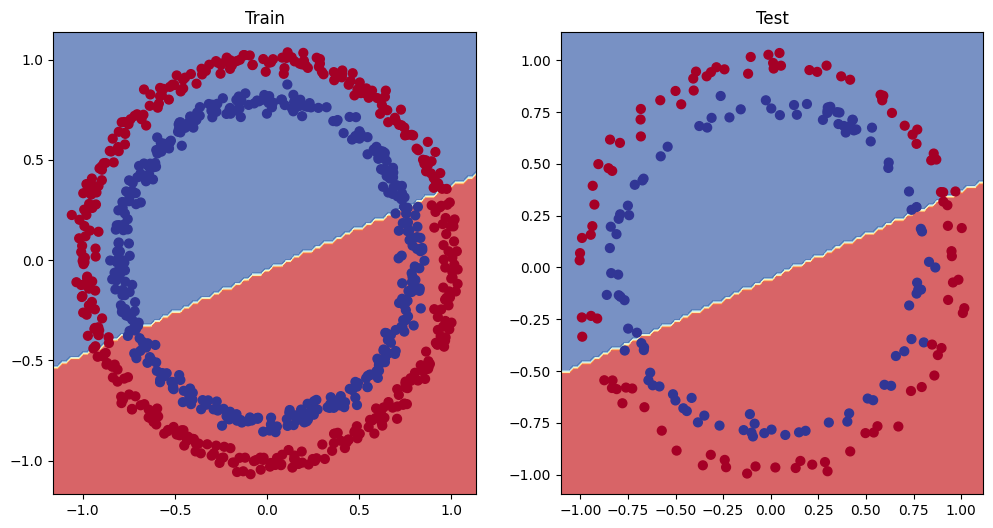

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)

It's currently trying to split the red and blue dots using a straight line... Clearly underfitting

Model can be improved by:

* Add more layers
* Add more hidden units
* Fitting for longer (more epochs)
* Change the learning rate
* Change the loss function
* Use transfer learning

## Bigger Model?

In [ ]:
# Making a better model

class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features=2, out_features=10)
    self.layer2 = nn.Linear(in_features=10, out_features=10)
    self.layer3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    # z = self.layer1(x)
    # z = self.layer2(z)
    # z = self.layer3(z)
    return self.layer3(self.layer2(self.layer1(x))) # Utilize speed ups


In [ ]:
model = CircleModelV1().to(device)
model

CircleModelV1(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
model.state_dict()

OrderedDict([('layer1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('layer1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('layer2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1310

In [ ]:
# Loss function
loss_fn = nn.BCEWithLogitsLoss()

# Optimizer
optimizer = torch.optim.SGD(params = model.parameters(), lr = 0.01)

# Accuracy function: same as before


In [ ]:
# Training

torch.manual_seed(42)

epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  # Training
  model.train()

  y_logits = model(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true = y_train, y_pred = y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Testing
  model.eval()
  with torch.inference_mode():
    test_logits = model(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

  test_loss = loss_fn(test_logits, y_test)
  test_acc = accuracy_fn(y_true = y_test, y_pred = test_pred)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Acc: {test_acc}")

Epoch: 0 | Loss: 0.69396 | Acc: 50.88% | Test Loss: 0.69261 | Test Acc: 51.0
Epoch: 100 | Loss: 0.69369 | Acc: 50.25% | Test Loss: 0.69269 | Test Acc: 50.0
Epoch: 200 | Loss: 0.69351 | Acc: 50.12% | Test Loss: 0.69282 | Test Acc: 49.5
Epoch: 300 | Loss: 0.69339 | Acc: 50.50% | Test Loss: 0.69295 | Test Acc: 49.0
Epoch: 400 | Loss: 0.69329 | Acc: 50.38% | Test Loss: 0.69309 | Test Acc: 48.5
Epoch: 500 | Loss: 0.69322 | Acc: 49.88% | Test Loss: 0.69322 | Test Acc: 49.5
Epoch: 600 | Loss: 0.69317 | Acc: 49.50% | Test Loss: 0.69335 | Test Acc: 53.0
Epoch: 700 | Loss: 0.69313 | Acc: 49.38% | Test Loss: 0.69347 | Test Acc: 50.5
Epoch: 800 | Loss: 0.69309 | Acc: 50.00% | Test Loss: 0.69358 | Test Acc: 51.0
Epoch: 900 | Loss: 0.69307 | Acc: 50.62% | Test Loss: 0.69368 | Test Acc: 47.5


Still not there

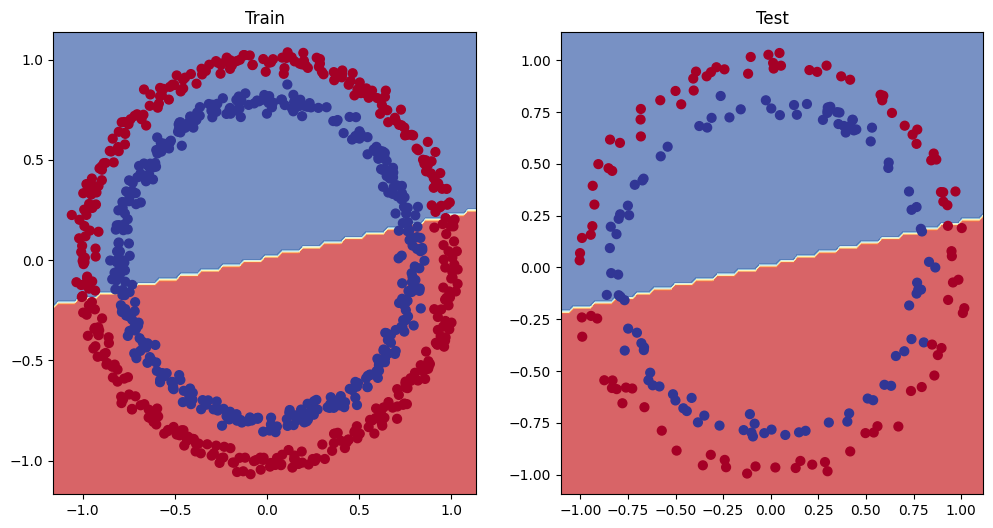

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)

This model can only learn linear functions, but the data is not linear!!!

## Non-Linearity

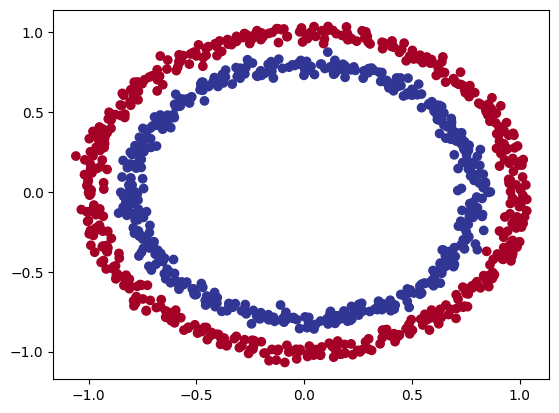

In [ ]:
n_samples = 1000
X, y = make_circles(n_samples, noise = 0.03, random_state=42)
plt.scatter(x = circles.X1, y = circles.X2, c = circles.label, cmap = plt.cm.RdYlBu)
circles = pd.DataFrame({"X1": X[:,0], "X2": X[:,1], "label": y})

In [ ]:
# Numpy to Tensor
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
X_train, X_train.shape

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         ...,
         [ 0.0157, -1.0300],
         [ 1.0110,  0.1680],
         [ 0.5578, -0.5709]]),
 torch.Size([800, 2]))

In [ ]:
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer1 = nn.Linear(in_features=2, out_features=8)
    self.layer2 = nn.Linear(in_features=8, out_features=10)
    self.layer3 = nn.Linear(in_features=10, out_features=8)
    self.layer4 = nn.Linear(in_features=8, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer4(self.layer3(self.relu(self.layer2(self.relu(self.layer1(x))))))

In [ ]:
model = CircleModelV2().to(device)
model

CircleModelV2(
  (layer1): Linear(in_features=2, out_features=8, bias=True)
  (layer2): Linear(in_features=8, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=8, bias=True)
  (layer4): Linear(in_features=8, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = model.parameters(), lr = 0.03)

In [ ]:
model.state_dict()

OrderedDict([('layer1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998]])),
             ('layer1.bias',
              tensor([ 0.5451,  0.1045, -0.3301,  0.1802, -0.3258, -0.0829, -0.2872,  0.4691])),
             ('layer2.weight',
              tensor([[-0.2791, -0.1630, -0.0998, -0.2126,  0.0334, -0.3492,  0.3193, -0.3003],
                      [ 0.2730,  0.0588, -0.1148,  0.2185,  0.0551,  0.2857,  0.0387, -0.1115],
                      [ 0.0950, -0.0959,  0.1488,  0.3157,  0.2044, -0.1546,  0.2041,  0.0633],
                      [ 0.1795, -0.2155, -0.3500, -0.1366, -0.2712,  0.2901,  0.1018,  0.1464],
                      [ 0.1118, -0.0062,  0.2767, -0.2512,  0.0223, -0.2413,  0.1090, -0.

In [ ]:
torch.manual_seed(42)

epochs = 3000
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  # Training
  model.train()

  y_logits = model(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true = y_train, y_pred = y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Testing
  model.eval()
  with torch.inference_mode():
    test_logits = model(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

  test_loss = loss_fn(test_logits, y_test)
  test_acc = accuracy_fn(y_true = y_test, y_pred = test_pred)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Acc: {test_acc}")

Epoch: 0 | Loss: 0.69617 | Acc: 50.00% | Test Loss: 0.69506 | Test Acc: 50.0
Epoch: 100 | Loss: 0.69273 | Acc: 52.75% | Test Loss: 0.69157 | Test Acc: 54.50000000000001
Epoch: 200 | Loss: 0.69217 | Acc: 50.50% | Test Loss: 0.69104 | Test Acc: 56.00000000000001
Epoch: 300 | Loss: 0.69183 | Acc: 50.88% | Test Loss: 0.69077 | Test Acc: 54.0
Epoch: 400 | Loss: 0.69151 | Acc: 51.38% | Test Loss: 0.69050 | Test Acc: 53.0
Epoch: 500 | Loss: 0.69115 | Acc: 51.25% | Test Loss: 0.69020 | Test Acc: 51.5
Epoch: 600 | Loss: 0.69078 | Acc: 51.75% | Test Loss: 0.68989 | Test Acc: 52.0
Epoch: 700 | Loss: 0.69036 | Acc: 52.12% | Test Loss: 0.68957 | Test Acc: 50.5
Epoch: 800 | Loss: 0.68990 | Acc: 53.50% | Test Loss: 0.68919 | Test Acc: 52.0
Epoch: 900 | Loss: 0.68939 | Acc: 57.12% | Test Loss: 0.68875 | Test Acc: 54.0
Epoch: 1000 | Loss: 0.68881 | Acc: 59.75% | Test Loss: 0.68821 | Test Acc: 56.99999999999999
Epoch: 1100 | Loss: 0.68817 | Acc: 61.12% | Test Loss: 0.68760 | Test Acc: 57.49999999999999


In [ ]:
model.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model(X_test))).squeeze()
y_preds[:5], y_test[:5]

(tensor([1., 0., 1., 0., 1.]), tensor([1., 0., 1., 0., 1.]))

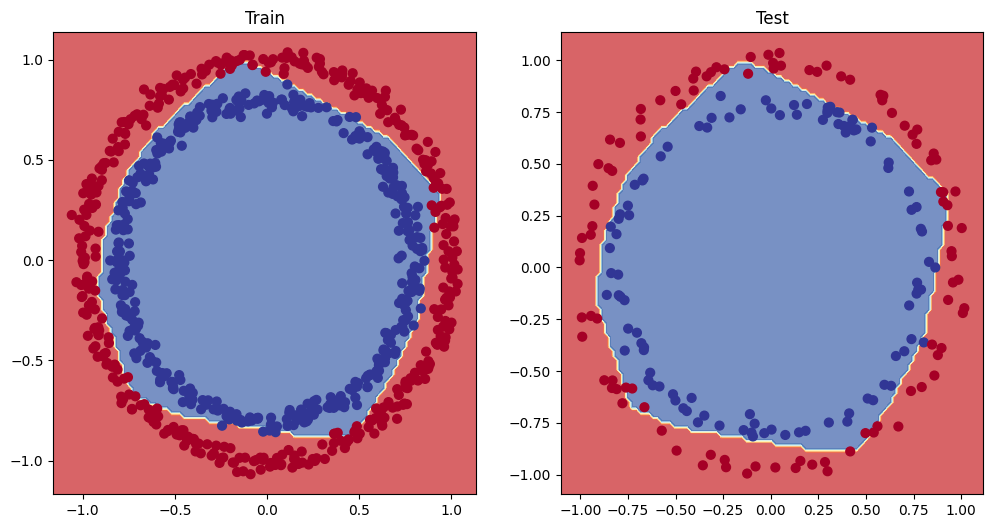

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)